In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import phik
from phik.report import plot_correlation_matrix
from phik import report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/top-spotify-songs-from-20102019-by-year/top10s.csv', sep=',', encoding="ISO-8859-1") 

In [3]:
df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.columns = ['title', 'artist', 'genre', 'year', 'tempo', 'energy', 
              'danceability', 'loudness', 'liveness', 'valence', 
              'lenght', 'acousticness', 'speechiness', 'popularity']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         603 non-null    object
 1   artist        603 non-null    object
 2   genre         603 non-null    object
 3   year          603 non-null    int64 
 4   tempo         603 non-null    int64 
 5   energy        603 non-null    int64 
 6   danceability  603 non-null    int64 
 7   loudness      603 non-null    int64 
 8   liveness      603 non-null    int64 
 9   valence       603 non-null    int64 
 10  lenght        603 non-null    int64 
 11  acousticness  603 non-null    int64 
 12  speechiness   603 non-null    int64 
 13  popularity    603 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 66.1+ KB


In [7]:
df.duplicated().sum()

0

- 13 features: 3 categorical and 10 numeric 
- No nulls and duplicates.

### EDA

<AxesSubplot:title={'center':'Number of hits by year'}, xlabel='year'>

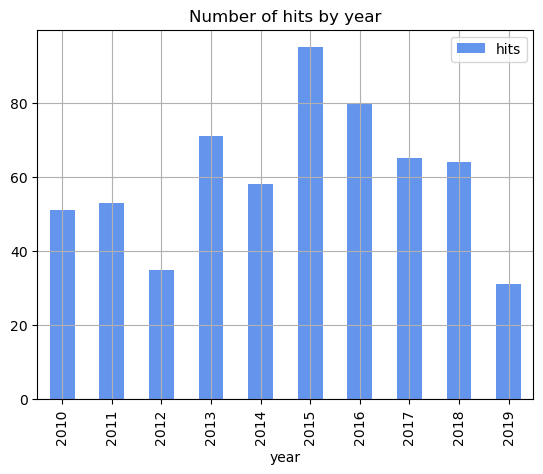

In [8]:
(df.groupby('year').agg({'title':'count'})
   .rename(columns={'title':'hits'})
   .plot(kind='bar', color='cornflowerblue', grid=True, linestyle='', linewidth=.01, title = 'Number of hits by year'))

Text(0.5, 1.0, 'Top artists by number of hits')

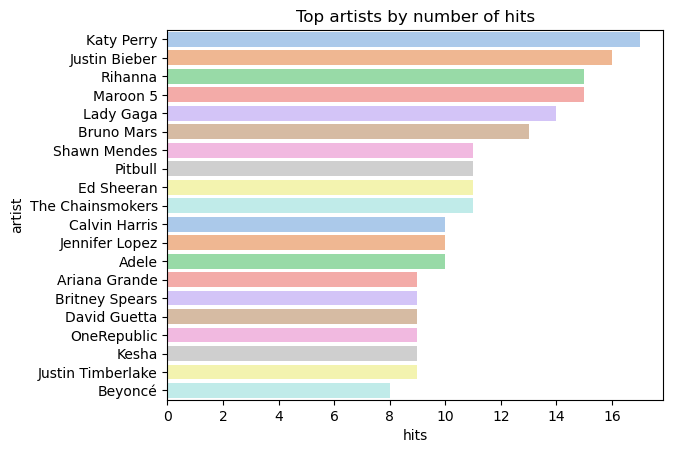

In [9]:
top_artists = df['artist'].value_counts().head(20).reset_index().rename(columns={'index':'artist', 'artist':'hits'})
sns.barplot(x=top_artists['hits'], y=top_artists['artist'], orient='h', palette='pastel').set_title('Top artists by number of hits')

<AxesSubplot:title={'center':'Percentage by number of hits per artist'}, ylabel='artist'>

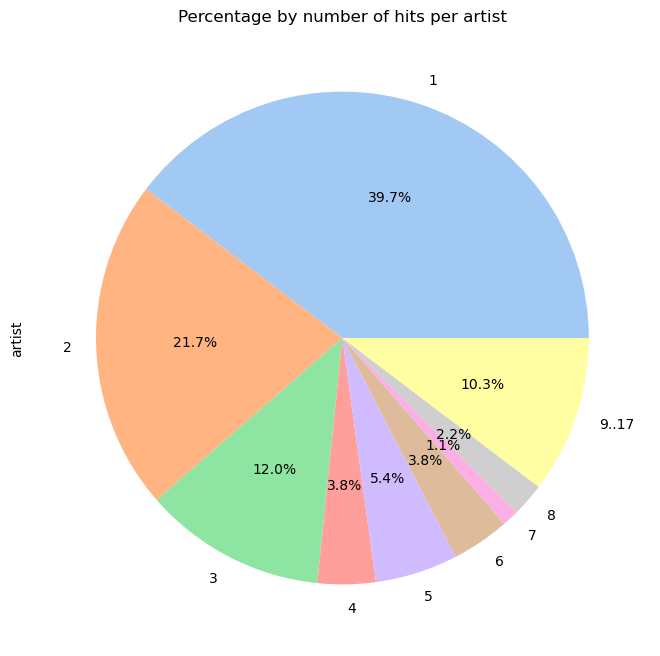

In [10]:
cnt_hits = df.groupby(['artist']).agg({'title':'count'}).reset_index().rename(columns={'index':'artist', 'title':'cnt_hits'})
cnt_hits['cnt_hits_group'] = cnt_hits['cnt_hits'].apply(lambda x: '9..17' if x > cnt_hits['cnt_hits'].quantile(q=0.9) else x)
colors = sns.color_palette('pastel') 
cnt_hits.groupby('cnt_hits_group')['artist'].count().plot(kind='pie', autopct='%1.1f%%', colors=colors, figsize=(8,8), 
                                                          textprops={'fontsize': 10}, title='Percentage by number of hits per artist')

Text(0.5, 1.0, 'Top genres by percentage of hits')

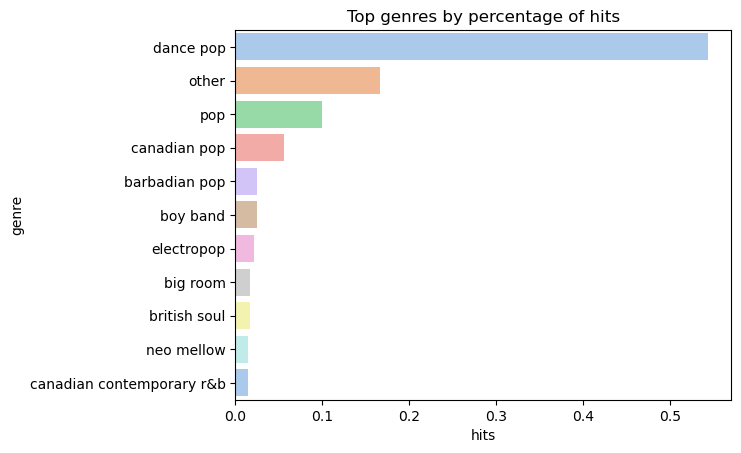

In [56]:
df['genre_cat'] = df['genre'].apply(lambda x: x if x in df['genre'].value_counts(normalize=True).head(10) else 'other')
top_genre = df['genre_cat'].value_counts(normalize=True).reset_index().rename(columns={'index':'genre', 'genre_cat':'hits'}) 
sns.barplot(x=top_genre['hits'], y=top_genre['genre'], orient='h', palette='pastel').set_title('Top genres by percentage of hits')

array([[<AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'lenght'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'popularity'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

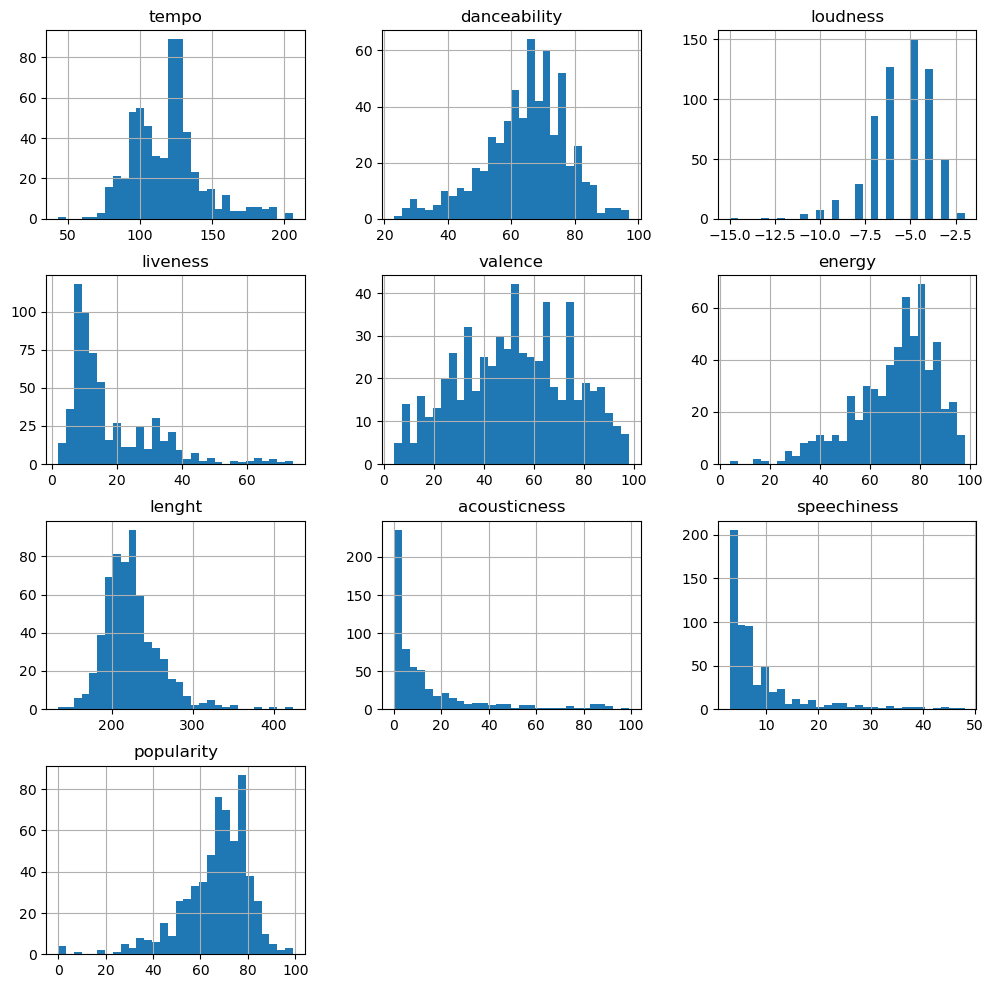

In [24]:
df[['tempo', 'danceability', 'loudness', 'liveness', 'valence', 
    'energy', 'lenght','acousticness','speechiness', 'popularity']].hist(bins=30, figsize = (12,12))

In [13]:
df[df['loudness'] < -10]

,title,artist,genre,year,tempo,energy,danceability,loudness,liveness,valence,lenght,acousticness,speechiness,popularity
207,Foolish Games,Jewel,alaska indie,2013,132,34,51,-11,12,7,250,23,3,36
241,Partition,Beyoncé,dance pop,2014,186,44,41,-12,31,17,319,3,29,65
329,What Do You Mean? - Acoustic,Justin Bieber,canadian pop,2015,125,36,77,-11,10,76,204,79,4,64
352,St Jude,Florence + The Machine,art pop,2015,117,43,26,-11,11,9,225,75,3,47
431,Start,John Legend,neo mellow,2016,110,4,52,-15,9,26,310,99,4,47
436,Beautiful Birds (feat. Birdy),Passenger,folk-pop,2016,86,17,39,-13,11,14,214,91,3,36
442,Million Years Ago,Adele,british soul,2016,0,0,0,-60,0,0,227,0,0,0
471,Love,Lana Del Rey,art pop,2017,99,37,53,-11,11,23,273,49,3,72


Found outlier and delete them.

In [14]:
df = df.drop(index=442, axis=True) 

### Сorrelation analysis

interval columns not set, guessing: ['year', 'tempo', 'energy', 'danceability', 'loudness', 'liveness', 'valence', 'lenght', 'acousticness', 'speechiness', 'popularity']


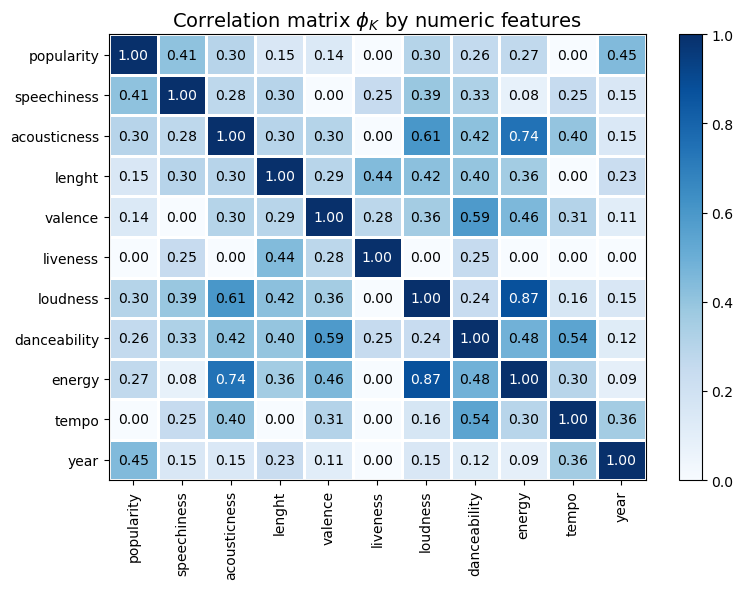

In [26]:
t=df[['year', 'tempo', 'energy', 'danceability', 'loudness', 'liveness', 'valence', 
      'lenght', 'acousticness','speechiness', 'popularity']].copy()
phik_overview = t.phik_matrix()  
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Blues", 
                        title=r"Correlation matrix $\phi_K$ by numeric features", 
                        fontsize_factor=1, 
                        figsize=(8, 6))
plt.tight_layout()

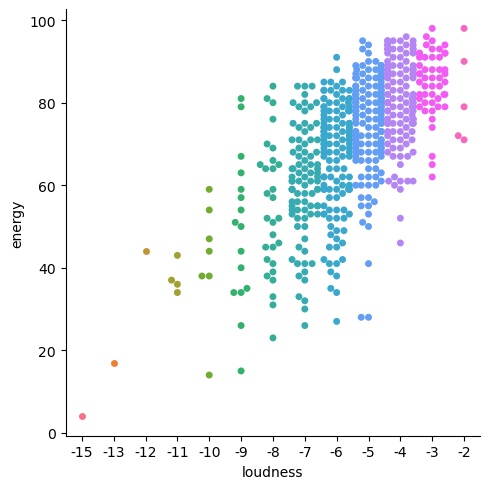

In [27]:
sns.catplot(y="energy", x="loudness", kind="swarm", palette='husl', data=df)

[]

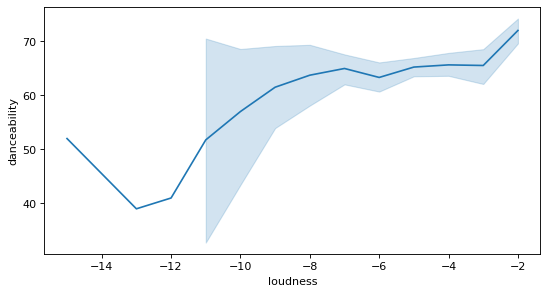

In [17]:
plt.figure(figsize=(8,4), dpi= 80)
q = sns.lineplot(x="loudness", y="danceability", data=df)
q.set()

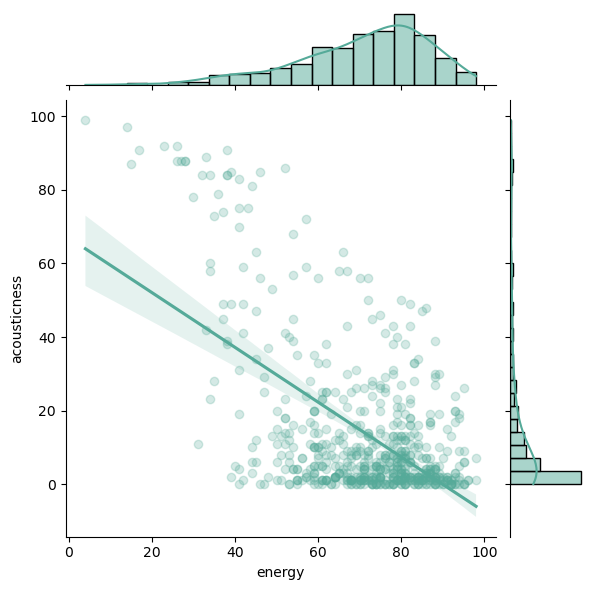

In [18]:
sns.jointplot(x=df['energy'], y=df['acousticness'], data=df, color='#5A9', kind='reg',joint_kws = {'scatter_kws':dict(alpha=0.25)})

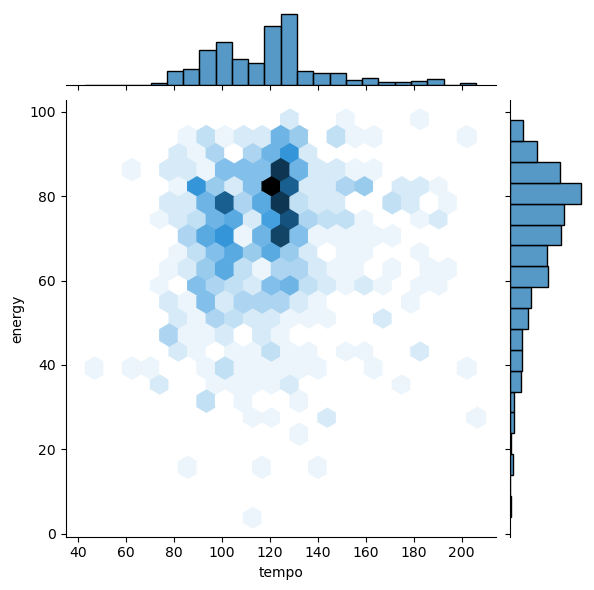

In [19]:
sns.jointplot(x=df['tempo'], y=df['energy'], data=df, kind='hex')

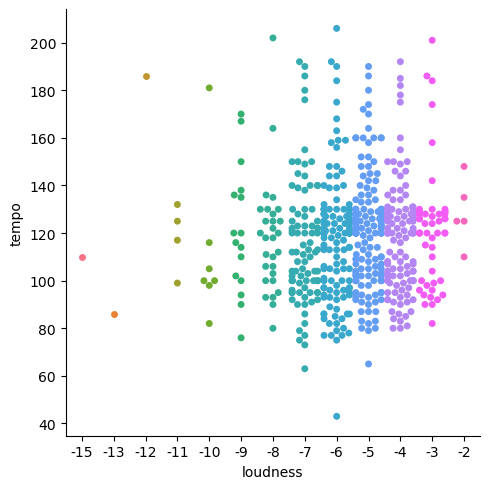

In [25]:
sns.catplot(x=df['loudness'], y=df['tempo'], data=df, kind="swarm", palette='husl')

[]

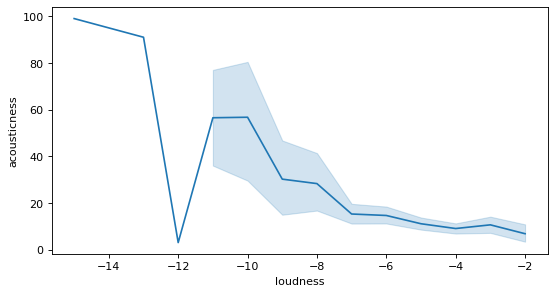

In [21]:
plt.figure(figsize=(8,4), dpi= 80)
q = sns.lineplot(x="loudness", y="acousticness", data=df)
q.set()

### How changing features of hits by years?

<AxesSubplot:xlabel='year', ylabel='tempo'>

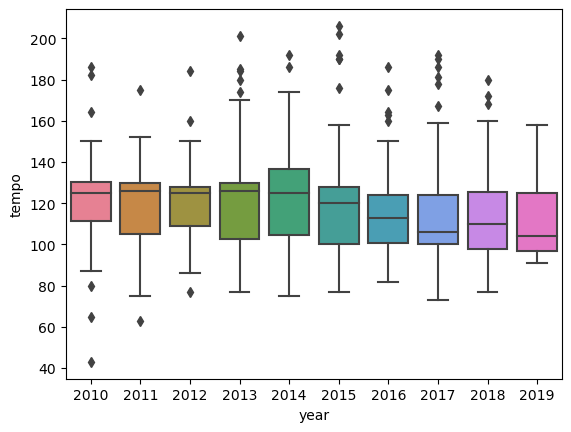

In [37]:
sns.boxplot(data=df, x="year", y="tempo", palette='husl')

[]

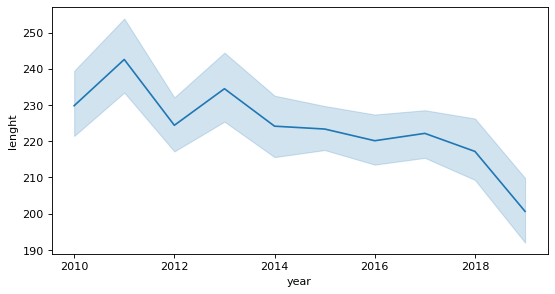

In [48]:
plt.figure(figsize=(8,4), dpi= 80)
q = sns.lineplot(x="year", y="lenght", data=df)
q.set()

<AxesSubplot:xlabel='year', ylabel='value'>

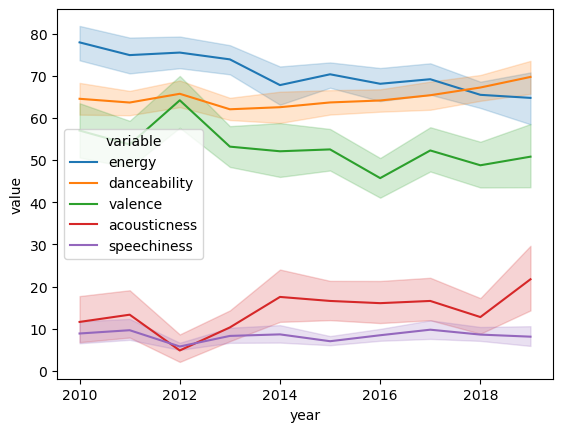

In [94]:
t_features_1 = df[['year', 'energy', 'danceability', 'valence', 'acousticness', 'speechiness']].copy()
sns.lineplot(x='year', y='value', hue='variable', data=pd.melt(t_features_1, ['year']))